# Samuelson-Hicks model
### Kirill Zakharov

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
plt.style.use("ggplot")

## Discrete Samuelson-Hicks model

In [2]:
ca = 1
ia = 2
n = 50
# r = 1.2
# c = 0.75
r = 0.5
c = 0.8

arrayY = [0, 0]
for t in range(2, n):
    y = ca + c*arrayY[t-1] + r*(arrayY[t-1]-arrayY[t-2]) + ia
    arrayY.append(y)    

### 0 < accelerator < 1

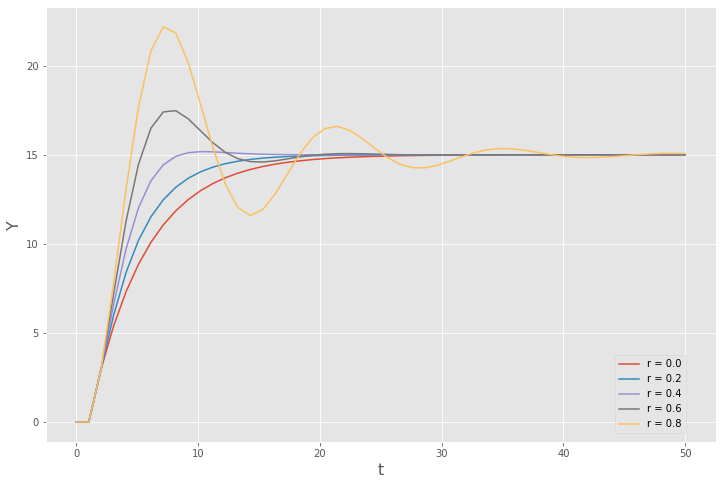

In [3]:
plt.subplots(figsize=(12, 8))
time = np.linspace(0, n, n)

for i in range(5):
    arrayY = [0, 0]
    for t in range(2, n):
        r = i/5
        c = 0.8
        y = ca + c*arrayY[t-1] + r*(arrayY[t-1]-arrayY[t-2]) + ia
        arrayY.append(y)  
    plt.plot(time, arrayY, label = f'r = {round(r, 2)}')
    
plt.legend(loc=(0.85,0.02))
plt.xlabel("t", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.show()

### accelerator > 1

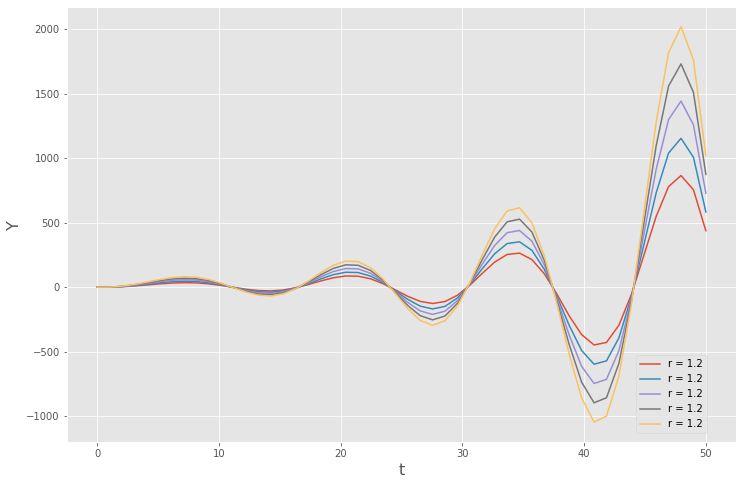

In [4]:
plt.subplots(figsize=(12, 8))
time = np.linspace(0, n, n)

for i in range(5):
    arrayY = [0, 0]
    for t in range(2, n):
        r = 1.2
        c = 0.75
        y = ca + c*arrayY[t-1] + r*(arrayY[t-1]-arrayY[t-2]) + ia
        arrayY.append(y + i)  
    plt.plot(time, arrayY, label = f'r = {round(r, 2)}')
    
plt.legend(loc=(0.85,0.02))
plt.xlabel("t", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.show()

### accelerator = 1

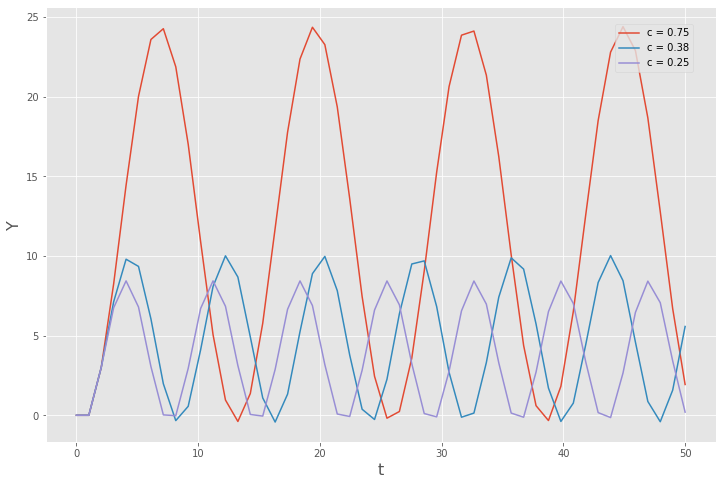

In [5]:
plt.subplots(figsize=(12, 8))
time = np.linspace(0, n, n)

for i in range(3):
    arrayY = [0, 0]
    for t in range(2, n):
        r = 1
        c = 0.75/(i+1)
        y = ca + c*arrayY[t-1] + r*(arrayY[t-1]-arrayY[t-2]) + ia
        arrayY.append(y)  
    plt.plot(time, arrayY, label = f'c = {round(c, 2)}')
    
plt.legend(loc=(0.85,0.85))
plt.xlabel("t", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.show()

## Continuous Samuelson-Hicks model

In [6]:
#Runge-Kutt method
def runge_Kutt(f, g, t0, x0, y0, h, b):
    t = t0
    x = x0
    y = y0
    arrayX = np.array([])
    arrayY = np.array([])
    arrayT = np.array([])
    while t<b:
        k1 = g(t, x, y)
        q1 = f(t, x, y)
        
        k2 = g(t + h/2, x + (h*q1)/2, y + (h*k1)/2)
        q2 = f(t + h/2, x + (h*q1)/2, y + (h*k1)/2)
        
        k3 = g(t + h/2, x + (h*q2)/2, y + (h*k2)/2)
        q3 = f(t + h/2, x + (h*q2)/2, y + (h*k2)/2)
        
        k4 = g(t + h, x + h*q3, y + h*k3)
        q4 = f(t + h, x + h*q3, y + h*k3)
        
        y = y + h*(k1 + 2*k2 + 2*k3 + k4)/6
        x = x + h*(q1 + 2*q2 + 2*q3 + q4)/6
        
        arrayX = np.append(arrayX, x)
        arrayT = np.append(arrayT, t)
        arrayY = np.append(arrayY, y)
        
        t += h
    return arrayT, arrayX, arrayY

In [7]:
ca = 1
r = 1
ia = 2
n = 30
c = 0.08

def f(t, x, y):
    return -(1-r)*x - (1-c)*y + (ca + ia)

def g(t, x, y):
    return x

p1, p2, p3 = runge_Kutt(f, g, 0, 0, 0, 0.01, 100)

### accelerator = 1

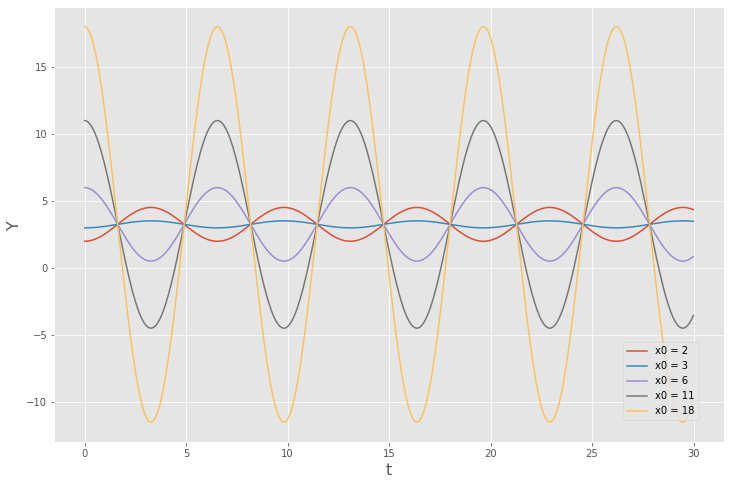

In [95]:
plt.subplots(figsize=(12, 8))

# plt.plot(p1, p2, label = 'X(t)')
for i in range(5):
    p1, p2, p3 = runge_Kutt(f, g, 0, 0, i**2+2, 0.01, 30)
    plt.plot(p1, p3, label = f'x0 = {i**2+2}')
    
plt.legend(loc=(0.85,0.05))
plt.xlabel("t", fontsize=16)
plt.ylabel("Y", fontsize=16)  
plt.show()

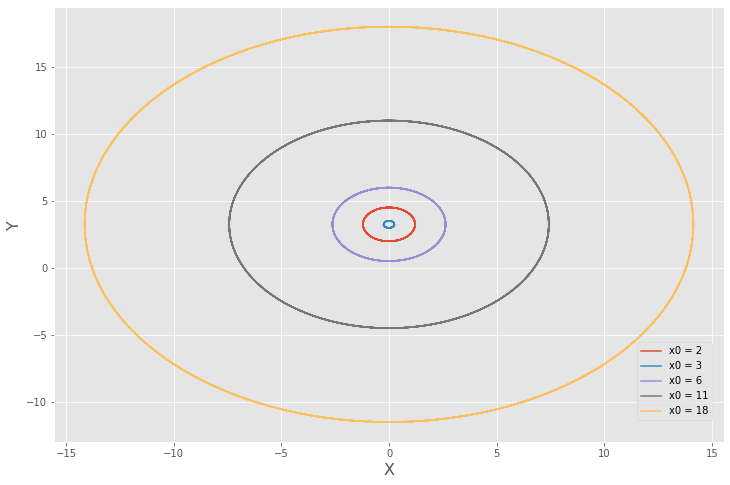

In [97]:
plt.subplots(figsize=(12, 8))

for i in range(5):
    p1, p2, p3 = runge_Kutt(f, g, 0, 0, i**2+2, 0.01, 40)
    plt.plot(p2, p3, label = f'x0 = {i**2+2}')

plt.legend(loc=(0.87,0.05))
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)  
plt.show()

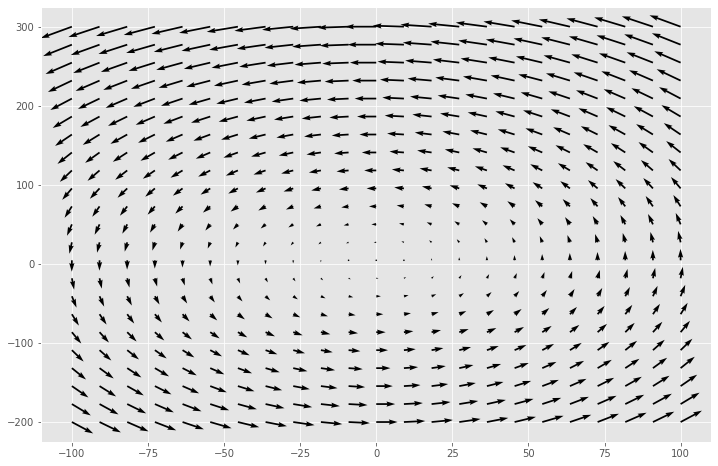

In [96]:
plt.subplots(figsize=(12, 8))
x, y = np.mgrid[-100:100:23j, -200:300:23j]

u = -(1-r)*x - (1-c)*y + (ca + ia)
v = x

plt.quiver(x, y, u , v)
plt.show()

### 0 < accelerator < 1

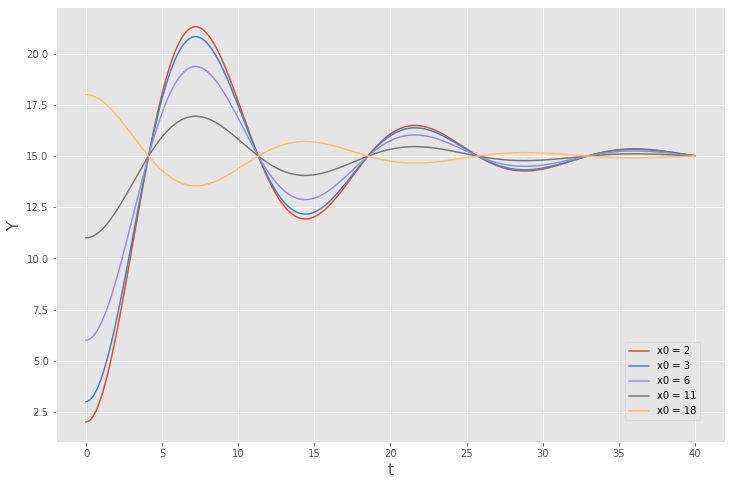

In [98]:
ca = 1
r = 0.8
ia = 2
n = 30
c = 0.8

plt.subplots(figsize=(12, 8))

# plt.plot(p1, p2, label = 'X(t)')
for i in range(5):
    p1, p2, p3 = runge_Kutt(f, g, 0, 0, i**2+2, 0.01, 40)
    plt.plot(p1, p3, label = f'x0 = {i**2+2}')
    
plt.legend(loc=(0.85,0.05))
plt.xlabel("t", fontsize=16)
plt.ylabel("Y", fontsize=16)  
plt.show()

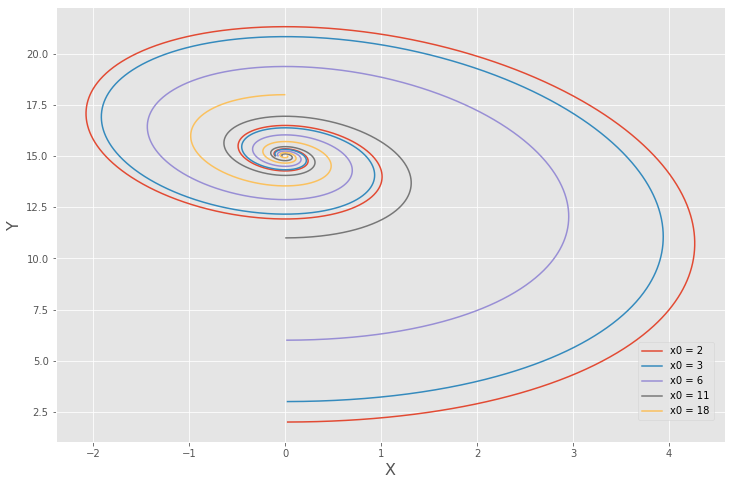

In [99]:
plt.subplots(figsize=(12, 8))

for i in range(5):
    p1, p2, p3 = runge_Kutt(f, g, 0, 0, i**2+2, 0.01, 40)
    plt.plot(p2, p3, label = f'x0 = {i**2+2}')

plt.legend(loc=(0.87,0.05))
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)  
plt.show()

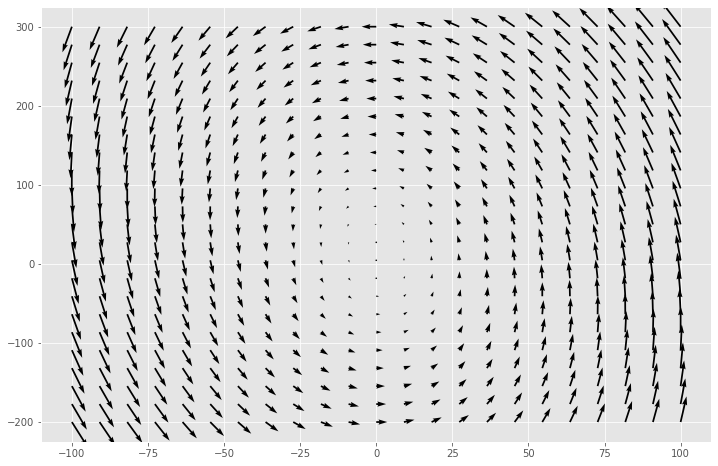

In [92]:
plt.subplots(figsize=(12, 8))
x, y = np.mgrid[-100:100:23j, -200:300:23j]

u = -(1-r)*x - (1-c)*y + (ca + ia)
v = x

plt.quiver(x, y, u , v)
plt.show()

### accelerator > 1

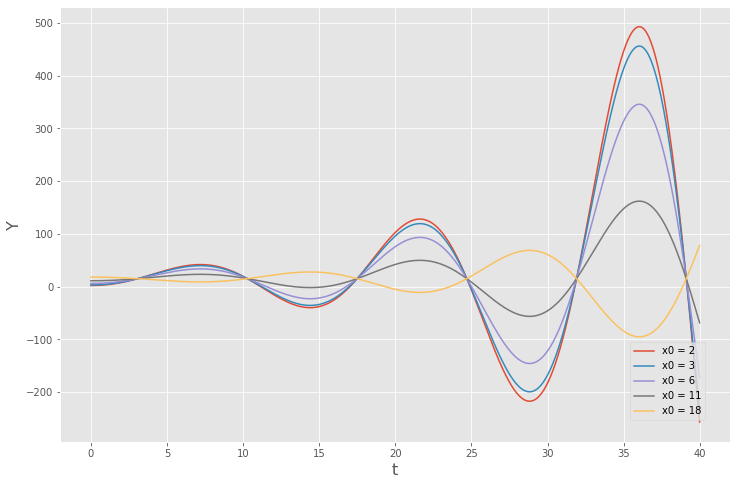

In [69]:
ca = 1
r = 1.2
ia = 2
n = 30
c = 0.8

plt.subplots(figsize=(12, 8))

for i in range(5):
    p1, p2, p3 = runge_Kutt(f, g, 0, 0, i**2+2, 0.01, 40)
    plt.plot(p1, p3, label = f'x0 = {i**2+2}')
    
plt.legend(loc=(0.85,0.05))
plt.xlabel("t", fontsize=16)
plt.ylabel("Y", fontsize=16)  
plt.show()

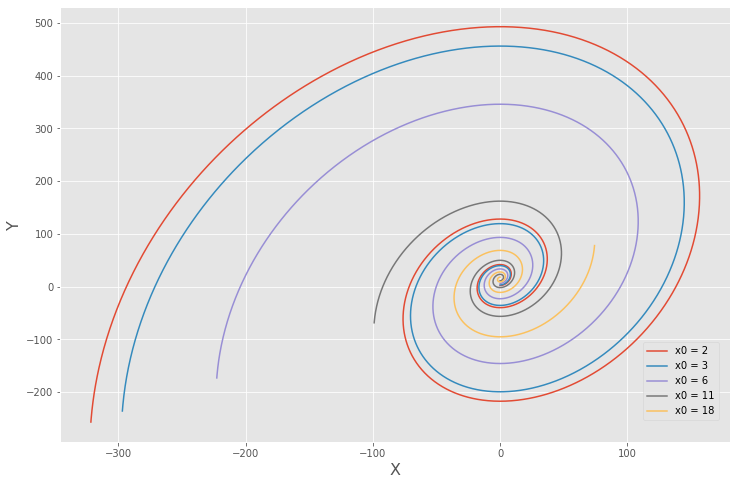

In [75]:
plt.subplots(figsize=(12, 8))

for i in range(5):
    p1, p2, p3 = runge_Kutt(f, g, 0, 0, i**2+2, 0.01, 40)
    plt.plot(p2, p3, label = f'x0 = {i**2+2}')

plt.legend(loc=(0.87,0.05))
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)  
plt.show()

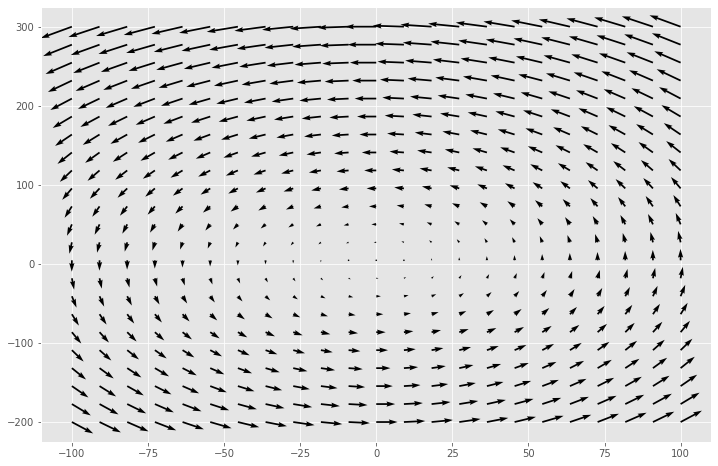

In [11]:
plt.subplots(figsize=(12, 8))
x, y = np.mgrid[-100:100:23j, -200:300:23j]

u = -(1-r)*x - (1-c)*y + (ca + ia)
v = x

plt.quiver(x, y, u , v)
plt.show()